# 7. Regression Modeling
[[back to top](#sections)]

In [361]:
import pickle
import pandas as pd
with open('../data/interim/roadway/preprocessing/df.pkl', 'rb') as f:
    df = pickle.load(f)

In [362]:
df.isnull().sum().sort_values(ascending=False)

PC                   70
Pop_den              70
HCV                  70
AADT                 70
Crashes               0
                     ..
I_SHD1_WTH            0
I_SHD1_TYP            0
ACC_CNTL              0
overall_landuse       0
sub_segment_index     0
Length: 62, dtype: int64

<mark>Fix this in the temporal feature preparation step</mark>

In [363]:
df=df.dropna(subset=['PC', 'Pop_den','HCV','AADT'])
df.isnull().sum().sort_values(ascending=False)

Crashes                      0
intersection_control_type    0
total_lanes                  0
sidewalk_buffer_type         0
sidewalk_width               0
                            ..
I_SHD2_WTH                   0
I_SHD2_TYP                   0
I_SHD1_WTH                   0
I_SHD1_TYP                   0
sub_segment_index            0
Length: 62, dtype: int64

In [364]:
df.head(2)

sub_segment_index  st_length  curve_ratio  one_way  bicycle_facility_width  \
0                  0  185.01332          1.0        0                     0.0   
1                  1  185.01332          1.0        0                     0.0   

  bicycle_path_category  bicycle_buffer_width bicycle_buffer_type  \
0                  None                   0.0                None   
1                  None                   0.0                None   

  bicycle_path_type bicycle_approach_alignment  ...  MUNI_NAME  NHS TRK_RT  \
0              None                       None  ...       0000    0      0   
1              None                       None  ...       0000    0      0   

    AADT   HCV Pop_den       PC  \
0  577.0  57.0   249.0  Unknown   
1  577.0  57.0   249.0  Unknown   

                                            geometry  Year Crashes  
0  LINESTRING (990250.010 1250037.162, 990247.945...  2014     0.0  
1  LINESTRING (990250.010 1250037.162, 990247.945...  2014     0.0  

[2 rows x 62 columns]

In [365]:
df.columns

Index(['sub_segment_index', 'st_length', 'curve_ratio', 'one_way',
       'bicycle_facility_width', 'bicycle_path_category',
       'bicycle_buffer_width', 'bicycle_buffer_type', 'bicycle_path_type',
       'bicycle_approach_alignment', 'bus_trips_total', 'crossing_aadt',
       'crossing_functional_classification', 'crossing_speed',
       'functional_classification', 'intersection_control_type',
       'lane_configuration', 'max_lanes_crossed', 'parking_lane_width',
       'marked_center_line', 'posted_speed', 'railroad_crossing_type',
       'right_turn_length', 'road_sign_type', 'sidewalk_buffer_width',
       'sidewalk_condition_score', 'sidewalk_width', 'sidewalk_buffer_type',
       'total_lanes', 'in_urbanized_area', 'volume_capacity',
       'overall_landuse', 'ACC_CNTL', 'I_SHD1_TYP', 'I_SHD1_WTH', 'I_SHD2_TYP',
       'I_SHD2_WTH', 'LN_WTH', 'LNS', 'MED_TYP', 'MED_WTH', 'SURF_TYP',
       'SURF_WTH', 'O_SHD1_TYP', 'O_SHD1_WTH', 'O_SHD2_TYP', 'O_SHD2_WTH',
       'OP_1_2_WAY'

In [366]:
df_urban=df[df['in_urbanized_area']=='Yes']
df_rural=df[df['in_urbanized_area']=='No']

In [367]:
import pickle
with open('../data/processed/df_urban.pkl', 'wb') as f:
    pickle.dump(df_urban, f)
with open('../data/processed/df_rural.pkl', 'wb') as f:
    pickle.dump(df_rural, f)
with open('../data/processed/df.pkl', 'wb') as f:
    pickle.dump(df, f)

<a id='train-test-split'></a>

## 5.1. Train-Test Split
* The training data is static and temporal features of roadway sub-segments for 2014-2017.
* The training label is the number of crashes for each sub-segments each year during 2014-2017.
* The testing data is static and temporal features of roadway sub-segments for 2018.
* The testing label is the number of crashes for each sub-segments in 2018.

### 1) Champaign County

In [ ]:
df_train = df[df['Year']<2018].iloc[:,0:61].copy()
df_train_label = df[df['Year']<2018].iloc[:,-1].copy()
df_test = df[df['Year']==2018].iloc[:,0:61].copy()
df_test_label = df[df['Year']==2018].iloc[:,-1].copy()

In [ ]:
df_train.shape

In [ ]:
df_train.head(2)

In [ ]:
df_train_label.head(2)

In [ ]:
df_test.shape

In [ ]:
df_test.head(2)

In [ ]:
df_test_label.head(2)

### 2) Urban/Rural

In [ ]:
df_urban_train = df_urban[df_urban['Year']<2018].iloc[:,0:61].copy()
df_urban_train_label = df_urban[df_urban['Year']<2018].iloc[:,-1].copy()
df_urban_test = df_urban[df_urban['Year']==2018].iloc[:,0:61].copy()
df_urban_test_label = df_urban[df_urban['Year']==2018].iloc[:,-1].copy()

In [ ]:
df_rural_train = df_rural[df_rural['Year']<2018].iloc[:,0:61].copy()
df_rural_train_label = df_rural[df_rural['Year']<2018].iloc[:,-1].copy()
df_rural_test = df_rural[df_rural['Year']==2018].iloc[:,0:61].copy()
df_rural_test_label = df_rural[df_rural['Year']==2018].iloc[:,-1].copy()

<a id='transformation-pipelines'></a>

## 5.2. Transformation Pipelines

### 1) Categorical attributes

In [ ]:
cat_attributes=['bicycle_path_category','bicycle_buffer_type', 'bicycle_path_type','bicycle_approach_alignment',
                'crossing_functional_classification','functional_classification', 'intersection_control_type',
                'lane_configuration','marked_center_line','railroad_crossing_type','road_sign_type',
                'sidewalk_buffer_type','in_urbanized_area','overall_landuse', 'ACC_CNTL', 'OP_1_2_WAY', 'PRK_LT', 'PRK_RT', 
                'JUR_TYPE', 'MPO', 'MUNI_NAME', 'NHS','TRK_RT', 'PC']

### 2) Numerical attributes

In [ ]:
num_attributes=df_train.describe().T.index.tolist()[1:]

In [ ]:
num_attributes_2=df_train.describe().T.index.tolist()[1:-1] # remove year field

In [ ]:
# Confirm no missing an attribute, except for sub_segment_id, geometry fields. 
len(cat_attributes)+len(num_attributes)

In [368]:
df_geom=df[['sub_segment_index','geometry','Year','Crashes','in_urbanized_area']]

In [370]:
import pickle
with open('../data/processed/df_geom.pkl', 'wb') as f:
    pickle.dump(df_geom, f)

### 3) Feature preprocessing
* Numerical attributes: standard scaling
* Categorical attributes: one-hot encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attributes),
        ("cat", OneHotEncoder(), cat_attributes),
    ])

In [ ]:
df_train_prepared = full_pipeline.fit_transform(df_train)
type(df_train_prepared)

In [ ]:
df_train_prepared

In [ ]:
df_train_label.shape

In [ ]:
df_urban_train_prepared = full_pipeline.fit_transform(df_urban_train)
df_rural_train_prepared = full_pipeline.fit_transform(df_rural_train)

In [ ]:
df_urban_train_prepared

In [ ]:
df_rural_train_prepared

In [ ]:
df_urban_train_label.shape

In [ ]:
df_test_prepared = full_pipeline.fit_transform(df_test)
df_test_prepared

In [ ]:
df_urban_test_prepared = full_pipeline.fit_transform(df_urban_test)
df_urban_test_prepared

In [ ]:
df_rural_test_prepared = full_pipeline.fit_transform(df_rural_test)
df_rural_test_prepared

In [ ]:
num_feature_names = num_attributes
cat_feature_names = pd.get_dummies(df[cat_attributes],columns=cat_attributes).columns.tolist()
df_feature_names = num_feature_names+cat_feature_names
len(df_feature_names)

In [ ]:
feature_sel = range(len(df_feature_names))
fnames = np.array(df_feature_names)[feature_sel]
print (fnames)

In [ ]:
with open('../data/processed/df_test_prepared.pkl', 'wb') as f:
    pickle.dump(df_test_prepared, f)
with open('../data/processed/df_test_label.pkl', 'wb') as f:
    pickle.dump(df_test_label, f)
with open('../data/processed/df_train_prepared.pkl', 'wb') as f:
    pickle.dump(df_train_prepared, f)
with open('../data/processed/df_train_label.pkl', 'wb') as f:
    pickle.dump(df_train_label, f)
with open('../data/processed/fnames.pkl', 'wb') as f:
    pickle.dump(fnames, f)
with open('../data/processed/df_geom.pkl', 'wb') as f:
    pickle.dump(df_geom, f)

In [ ]:
with open('../data/processed/df_urban_test_prepared.pkl', 'wb') as f:
    pickle.dump(df_urban_test_prepared, f)
with open('../data/processed/df_urban_test_label.pkl', 'wb') as f:
    pickle.dump(df_urban_test_label, f)
with open('../data/processed/df_urban_train_prepared.pkl', 'wb') as f:
    pickle.dump(df_urban_train_prepared, f)
with open('../data/processed/df_urban_train_label.pkl', 'wb') as f:
    pickle.dump(df_urban_train_label, f)

In [ ]:
with open('../data/processed/df_rural_test_prepared.pkl', 'wb') as f:
    pickle.dump(df_rural_test_prepared, f)
with open('../data/processed/df_rural_test_label.pkl', 'wb') as f:
    pickle.dump(df_rural_test_label, f)
with open('../data/processed/df_rural_train_prepared.pkl', 'wb') as f:
    pickle.dump(df_rural_train_prepared, f)
with open('../data/processed/df_rural_train_label.pkl', 'wb') as f:
    pickle.dump(df_rural_train_label, f)

### 4) Explanatory variable subsets

In [1]:
import pickle
import pandas as pd
with open('../data/processed/fnames.pkl', 'rb') as f:
    fnames = pickle.load(f)
with open('../data/processed/df_train_prepared.pkl', 'rb') as f:
    df_train_prepared = pickle.load(f)
with open('../data/processed/df_test_prepared.pkl', 'rb') as f:
    df_test_prepared = pickle.load(f)
with open('../data/processed/df_urban_train_prepared.pkl', 'rb') as f:
    df_urban_train_prepared = pickle.load(f)
with open('../data/processed/df_urban_test_prepared.pkl', 'rb') as f:
    df_urban_test_prepared = pickle.load(f)
with open('../data/processed/df_rural_train_prepared.pkl', 'rb') as f:
    df_rural_train_prepared = pickle.load(f)
with open('../data/processed/df_rural_test_prepared.pkl', 'rb') as f:
    df_rural_test_prepared = pickle.load(f)
with open('../data/processed/fnames.pkl', 'rb') as f:
    fnames=pickle.load(f)

#### * Remove list of variables

In [5]:
import sys; sys.path.insert(0, '..')
import importlib
import src.models

In [16]:
from src.models import func_remove_var
importlib.reload (src.models)
remove_list=['Year','volume_capacity']
func_remove_var(df_train_prepared, remove_list, fnames)

259


<978980x259 sparse matrix of type '<class 'numpy.float64'>'
	with 55801860 stored elements in Compressed Sparse Row format>

#### * Keep list of variables 

In [20]:
from src.models import func_keep_var
importlib.reload (src.models)
keep_list=['st_length', 'curve_ratio', 'one_way' ,'bicycle_facility_width']
func_keep_var(df_train_prepared,keep_list,fnames)

<978980x4 sparse matrix of type '<class 'numpy.float64'>'
	with 3915920 stored elements in Compressed Sparse Row format>

<a id='regression-model-evaluation-matrices'></a>

## 5.3 Regression model evaluation matrices  

There are three stages to evaluate a model, as shown in the image below:  
<img src="grid_search_workflow.png" style="width:500px;">  
Source: [Scikit-Learn Documentation](https://scikit-learn.org/)

* 

### 1) Overall Mean Squared Error

In [4]:
import pickle
import pandas as pd
import sys; sys.path.insert(0, '..')
import importlib
import src.models
with open('../models/segment/county/tree/tree_prediction_20200421-145047.pkl', 'rb') as f:
    tree_prediction = pickle.load(f)
with open('../data/processed/df_train_label.pkl', 'rb') as f:
    df_train_label = pickle.load(f)

In [5]:
from src.models import func_rmse
importlib.reload (src.models)
overall_rmse=func_rmse(df_train_label,tree_prediction)
overall_rmse

0.08748972625960605

### 2) Cross Valuation Score

In [6]:
import pickle
import pandas as pd
with open('../models/segment/county/tree/tree_reg_20200421-145047.pkl', 'rb') as f:
    tree_reg = pickle.load(f)
with open('../data/processed/df_train_label.pkl', 'rb') as f:
    df_train_label = pickle.load(f)
with open('../data/processed/df_train_prepared.pkl', 'rb') as f:
    df_train_prepared = pickle.load(f)

In [22]:
with open('../models/segment/county/lin/lin_reg_20200416-104353.pkl', 'rb') as f:
    lin_reg = pickle.load(f)

In [77]:
importlib.reload (src.models)
from src.models import func_cross_val
cross_val_score=func_cross_val(lin_reg, df_train_prepared[:1000], df_train_label[:1000], cv=2)
cross_val_score

array([-0.0448971, -0.7151592])

### 3) Mean Squared Error by number of crashes

In [44]:
importlib.reload (src.models)
from src.models import func_rmse_crashes
crashes_rmse=func_rmse_crashes(df_train_label,tree_prediction)
crashes_rmse

[0.09180370620198626,
 0.9929393977498389,
 1.9759940161975587,
 2.9920593835749165,
 5.0065746247992955]

### 4) Mean Squared Error by functional class

In [46]:
with open('../data/processed/fnames.pkl', 'rb') as f:
    fnames=pickle.load(f)
from src.models import func_keep_var
importlib.reload (src.models)
keep_list=['functional_classification_Interstate',
           'functional_classification_Major Arterial',
           'functional_classification_Minor Arterial',
           'functional_classification_Major Collector',
           'functional_classification_Minor Collector',
           'functional_classification_Local Road or Street',]
df_Func=func_keep_var(df_train_prepared,keep_list,fnames)
df_Func

<978980x6 sparse matrix of type '<class 'numpy.float64'>'
	with 978980 stored elements in Compressed Sparse Row format>

In [47]:
importlib.reload (src.models)
from src.models import func_functional_compare
func_error=func_functional_compare(df_Func,df_train_label,tree_prediction)
func_error

[0.616422758883489,
 0.2714665948940218,
 0.1774908515077624,
 0.1439345766658114,
 0.09085741793519739,
 0.10279887623532967]

### 5) Histogram

In [51]:
with open('../models/segment/county/tree/tree_prediction_20200421-145047.pkl', 'rb') as f:
    tree_prediction = pickle.load(f)

In [52]:
importlib.reload (src.models)
from src.models import func_hist
histo=func_hist(df_train_label,tree_prediction)
histo

0.0    0.035299
1.0   -3.439012
2.0    0.268589
3.0    0.169355
4.0    0.328947
Name: diff, dtype: float64

### 6) Mapping

### * Observed crash mapping

In [7]:
import pickle
import pandas as pd
with open('../data/processed/df_geom.pkl', 'rb') as f:
    df_geom = pickle.load(f)

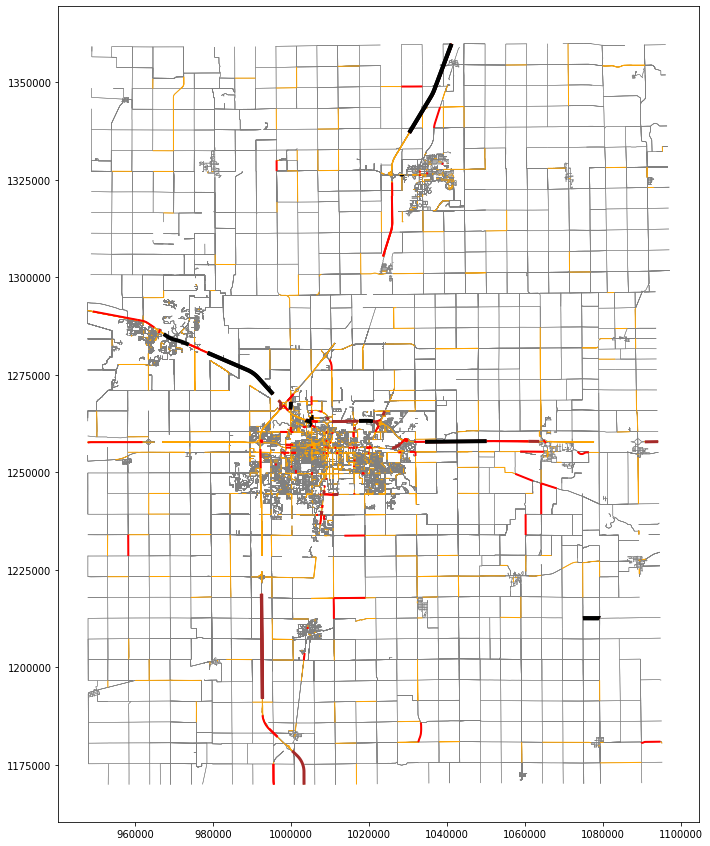

In [349]:
importlib.reload (src.models)
from src.models import observed_crashes_map
observed_crashes_map(df_geom,2017)

### * Training set modeled crashes mapping

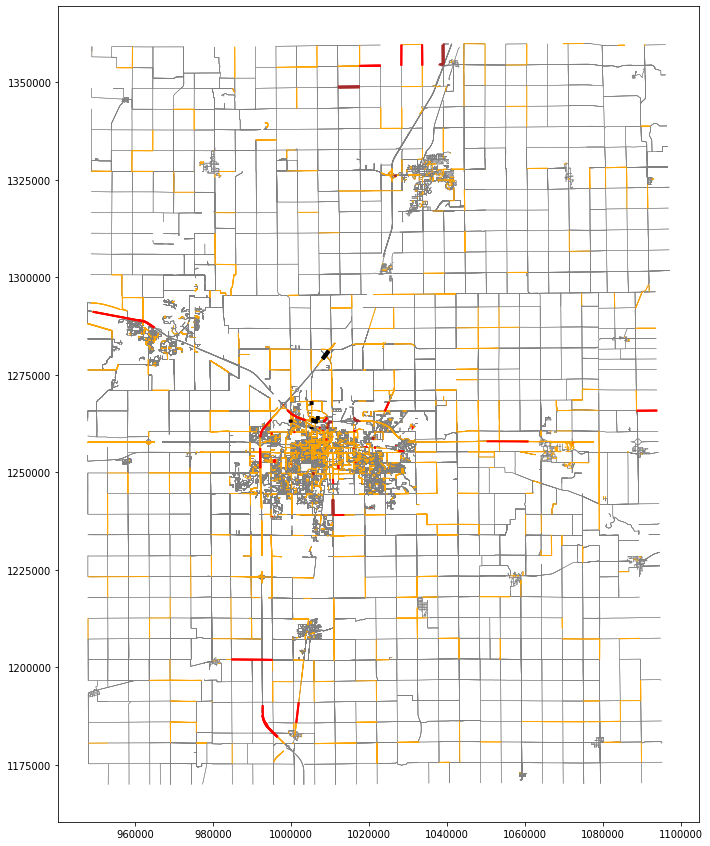

In [53]:
importlib.reload (src.models)
from src.models import prediction_maps
training_map_name='tree_prediction_20200421-145047'
prediction_maps (df_geom, tree_prediction, 2017, 'segment','county','tree',training_map_name)

### * Test set observed crashes mapping

In [12]:
with open('../models/segment/county/tree/tree_reg_20200421-145047.pkl', 'rb') as f:
    tree_reg = pickle.load(f)
with open('../data/processed/df_test_prepared.pkl', 'rb') as f:
    df_test_prepared = pickle.load(f)

In [13]:
from sklearn.tree import DecisionTreeRegressor
test_tree_prediction = tree_reg.predict(df_test_prepared)

In [15]:
with open('../models/segment/county/tree/test_tree_prediction_20200421-145047.pkl', 'wb') as f:
    pickle.dump(test_tree_prediction, f)

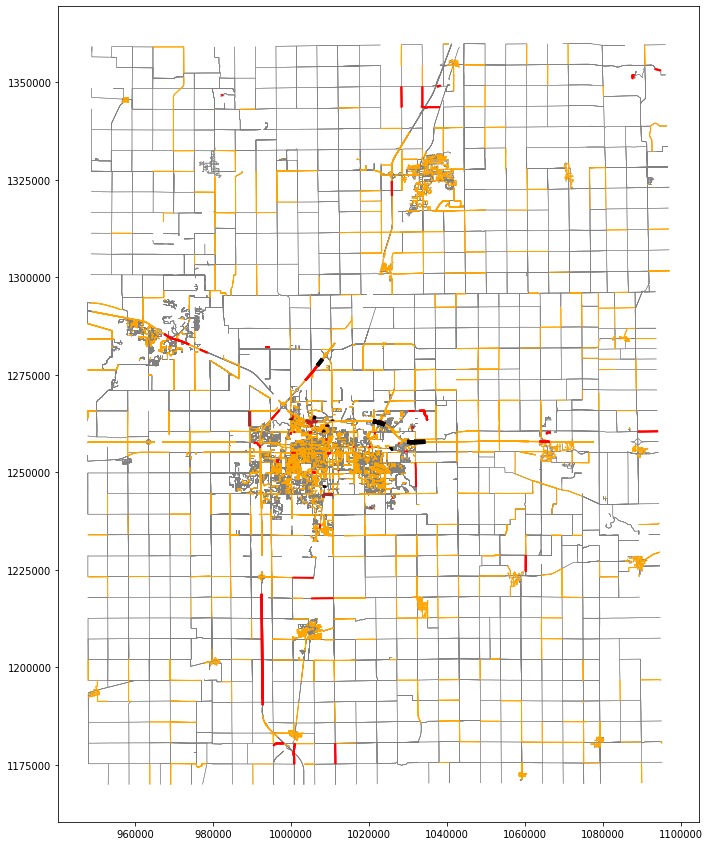

In [54]:
importlib.reload (src.models)
from src.models import test_prediction_maps
testing_map_name='test_tree_prediction_20200421-145047'
test_prediction_maps (df_geom, test_tree_prediction,'segment','county','tree', testing_map_name)

### 7) Summary report
Summarize the model results defined in the above sections and write to a log file.  
The following section documents Round 1 model run results.

To do:  
* add model parameter dictionary
* xgboost applicability
* matrices setting reading: training, testing score record

In [8]:
import pandas as pd
import datetime

In [10]:
import pickle
import sys; sys.path.insert(0, '..')
import importlib
import src.models
with open('../data/processed/df_train_prepared.pkl', 'rb') as f:
    df_train_prepared = pickle.load(f)
with open('../data/processed/df_train_label.pkl', 'rb') as f:
    df_train_label = pickle.load(f)
with open('../data/processed/fnames.pkl', 'rb') as f:
    fnames=pickle.load(f)

In [35]:
# import model results
with open('../models/segment/county/lin/lin_prediction_20200416-104353.pkl', 'rb') as f:
    lin_prediction = pickle.load(f)
with open('../models/segment/county/lin/lin_reg_20200416-104353.pkl', 'rb') as f:
    lin_reg = pickle.load(f)

In [ ]:
# import model results
with open('../models/segment/county/tree/tree_prediction_20200421-145047.pkl', 'rb') as f:
    tree_prediction = pickle.load(f)
with open('../models/segment/county/tree/tree_reg_20200421-145047.pkl', 'rb') as f:
    tree_reg = pickle.load(f)

In [54]:
# import model results
with open('../models/segment/county/xgboost/xgboost_prediction_20200416_143345.pkl', 'rb') as f:
    xgboost_prediction = pickle.load(f)
with open('../models/segment/county/xgboost/xgboost_20200416-115616.model', 'rb') as f:
    xgboost_reg = pickle.load(f)

UnpicklingError: invalid load key, '\x00'.

In [42]:
importlib.reload (src.models)
from src.models import summary_report
model_results= summary_report (tree_reg, df_train_label, tree_prediction, df_train_prepared, 2, fnames)
#model_results= summary_report (lin_reg, df_train_label, lin_prediction, df_train_prepared, 2, fnames)

In [43]:
overall_rmse = model_results[0]
cross_val_score = model_results[1]
crashes_rmse = model_results[2]
func_error = model_results[3]
histo = model_results[4]

In [44]:
training_map_name='tree_prediction_20200421-145047'
#training_map_name='lin_prediction_20200416-104353'
#importlib.reload (src.models)
#from src.models import prediction_maps
#with open('../data/processed/df_geom.pkl', 'rb') as f:
#    df_geom = pickle.load(f)
#prediction_maps (df_geom, lin_prediction, 2014, 'segment','county','lin',training_map_name)
#prediction_maps (df_geom, lin_prediction, 2015, 'segment','county','lin',training_map_name)
#prediction_maps (df_geom, lin_prediction, 2016, 'segment','county','lin',training_map_name)
#prediction_maps (df_geom, lin_prediction, 2017, 'segment','county','lin',training_map_name)

In [45]:
segment_intersection='segment'
model_geography='county'
model_type='regression'

model='lin'
model_name='lin_reg_20200416-104353'
model_parameters='null'
n_variables=len(fnames)
variables=fnames

#model='tree'
#model_name='tree_reg_20200421-145047'
#model_parameters={'max_depth': 'None'}
#n_variables=len(fnames)
#variables=fnames

In [51]:
import getpass 
username = getpass. getuser() 
log=pd.read_csv('../models/model_log.csv')  
field_names=log.columns.tolist()
model_results= {'id': log.tail(1)['id'][0]+1,
            'staff': getpass. getuser() ,
            'time_stamp': datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
            'segment_intersection': segment_intersection,
            'model_geography': model_geography,
            'model_type': model_type,
            'model': model,
            'model_name': model_name,
            'overall_rmse' : overall_rmse,
            'cross_val_score': cross_val_score,
            'crashes_rmse_0': crashes_rmse[0],
            'crashes_rmse_1': crashes_rmse[1],
            'crashes_rmse_2': crashes_rmse[2],
            'crashes_rmse_3': crashes_rmse[3],
            'crashes_rmse_4+': crashes_rmse[4],
            'func_error_interstate': func_error[0],
            'func_error_maj_art': func_error[1],
            'func_error_min_art': func_error[2],
            'func_error_maj_col': func_error[3],
            'func_error_min_col': func_error[4],
            'func_error_local': func_error[5],
            'histo_0': histo[0],
            'histo_1': histo[1],
            'histo_2': histo[2],
            'histo_3': histo[3],
            'histo_4+': histo[4],
            'map_2014': '2014_'+training_map_name,
            'map_2015': '2015_'+training_map_name,
            'map_2016': '2016_'+training_map_name,
            'map_2017': '2017_'+training_map_name,
            'model_parameters': model_parameters,
            'n_variables': n_variables,
            'variables': variables}

In [52]:
importlib.reload (src.models)
from src.models import model_log
model_log('../models/model_log.csv', model_results, field_names)

<a id='class-model-evaluation-matrices'></a>

## 5.4 Classification model evaluation matrices

### 2) Grouped classification error

Reading list:
* [Tour of Evaluation Metrics for Imbalanced Classification(]https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)
* The 5 Classification Evaluation metrics
* 24 Evaluation Metrics for Binary Classification (And When to Use Them) 

<a id='decision-tree'></a>

## 5.5. Decision Tree

In [ ]:
import pickle
import pandas as pd
with open('../data/processed/df_train_prepared.pkl', 'rb') as f:
    df_train_prepared = pickle.load(f)
with open('../data/processed/df_train_label.pkl', 'rb') as f:
    df_train_label = pickle.load(f)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_train_prepared, df_train_label)

In [ ]:
from sklearn.metrics import mean_squared_error
tree_prediction = tree_reg.predict(df_train_prepared)
tree_mse = mean_squared_error(df_train_label, tree_prediction )
tree_rmse = np.sqrt(tree_mse)
tree_rmse ## 0.087, better than linear regressor's 0.1215

In [ ]:
import pickle
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
with open('../models/segment/county/tree/tree_reg_'+timestr+'.pkl', 'wb') as f:
    pickle.dump(tree_reg, f)
with open('../models/segment/county/tree/tree_prediction'+timestr+'.pkl', 'wb') as f:
    pickle.dump(tree_prediction, f)

In [ ]:
with open('../models/segment/county/tree/tree_reg_20200421-145047.pkl', 'rb') as f:
    tree_reg = pickle.load(f)
with open('../models/segment/county/tree/tree_reg_20200421-145047.pkl', 'rb') as f:
    tree_prediction = pickle.load(f)

### 1) Optimized tree depth

The depth of a well-balanced binary tree containing m leaves is equal to log2(m), rounded up. 

In [ ]:
df_train_label.shape[0] # Approximately 1 million training instances

In [ ]:
import math
math.log2(df_train_label.shape[0])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_depth20 = DecisionTreeRegressor(max_depth=20)
tree_reg_depth20.fit(df_train_prepared, df_train_label)

tree_prediction_depth20 = tree_reg_depth20.predict(df_train_prepared)

In [ ]:
tree_mse = mean_squared_error(df_train_label, tree_prediction_depth20)
tree_rmse = np.sqrt(tree_mse)
tree_rmse ## 0.102

### 2) Visualizing the tree

Tree structure indicates that heavy vehicle counts (HCV), AADT of crossing streets, segment length, AADT, lane configuration, and maximum lanes-crossed are the important features. Restricting the maximum-depth of the tree does not impact the initial branches. 

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,4), dpi=300)
            
tree.plot_tree(tree_reg, 
               max_depth=2,
               feature_names = fnames,
               filled=True,
               proportion=True,
               fontsize=8
)
timestr = time.strftime("%Y%m%d-%H%M%S")
fig.savefig('../reports/figures/model_results/segment/county/tree/DecisionTree_Depth3_'+timestr+'.png')

### 2) Model Performance

Tree with 20 maximum depth will generally perform worse than a tree with no depth limitations

In [ ]:
# 10 segments with more than 1 crashes
t_label=df_train_label[df_train_label>=1].head(10)
t_index=t_label.index.tolist()
t_label

In [ ]:
t=df_train_prepared[t_index]
t

In [ ]:
t_tree_prediction=tree_reg.predict(t)
t_tree_prediction

In [ ]:
t_tree_depth20_prediction=tree_reg_depth20.predict(t)
t_tree_depth20_prediction

In [ ]:
t_label

In [ ]:
plt.hist(tree_prediction) 
plt.title("histogram") 
plt.show()

In [ ]:
plt.hist(tree_prediction_depth20) 
plt.title("histogram") 
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_scores
cores = cross_val_score(tree_reg, df_train_prepared, df_train_label,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(tree_rmse_scores)

* Scores: [0.13661763 0.17026498 0.13604928 0.14240234 0.12886054 0.13806345 0.16688535 0.12048619 0.16215687 0.13385693]  
* Mean: 0.1435643563374312  
* Standard deviation: 0.01606815155715894  

In [ ]:
scores = cross_val_score(tree_reg_depth20, df_train_prepared, df_train_label,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

In [ ]:
observed_crashes_map (2015)

In [ ]:
prediction_maps (tree_prediction, 2015)

In [ ]:
prediction_maps (tree_prediction_depth20, 2015) # Much worse than unconstrained tree

In [ ]:
test_tree_prediction = tree_reg.predict(df_test_prepared)
test_prediction_maps (test_tree_prediction)

<a id='random-forest'></a>

## 5.6. Random Forest

This takes too long to run

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(df_train_prepared, df_train_label)
forest_rmse

In [ ]:
t_prediction=forest_reg.predict(t)
t_prediction

In [ ]:
df_train_prediction = forest_reg.predict(df_train_prepared)
plt.hist(df_train_prediction) 
plt.title("histogram") 
plt.show()

In [ ]:
scores = cross_val_score(forest_reg, df_train_prepared, df_train_label,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(forest_rmse_scores)

<a id='svm'></a>

## 5.7. Support Vector Machines

<a id='xgboost'></a>

## 5.8. Extreme Gradient Boosting (XGBoost)

In [ ]:
# Reference: https://github.com/dwilson1988/azure-utah-accidents-prediction/blob/master/notebooks/4_train_model.ipynb

### 1) Regression Problem

In [ ]:
fnames

In [ ]:
import pickle
with open('../data/processed/fnames.pkl', 'rb') as f:
    fnames = pickle.load(f)

In [ ]:
df_train_prepared[:1000]

In [ ]:
import xgboost

dtrain = xgboost.DMatrix(df_train_prepared,label=df_train_label,feature_names=fnames)
dtest = xgboost.DMatrix(df_test_prepared,label=df_test_label,feature_names=fnames)

params = {
    'max_depth':6,
    'min_child_weight': 5.0,
    'reg_lambda': 1.0,
    'reg_alpha':0.0,
    'scale_pos_weight':1.0,
    'eval_metric':'auc',
    'objective':'reg:squarederror',
    'eta':0.5
}

In [ ]:
dtrain

In [ ]:
dtest

In [ ]:
booster = xgboost.train(params,dtrain,
    evals = [(dtest, 'eval')],
    num_boost_round=3000,
    early_stopping_rounds=25
) # Best iteration: [87] eval-auc:0.832059

#### * Feature Importance

In [ ]:
plt.figure(figsize=(15,45))
xgboost_feature_importance=xgboost.plot_importance(booster,ax=plt.gca(),importance_type='weight')

In [ ]:
xgboost_feature_importance.figure.savefig('xgboost_feature_importance.png')

<img src="xgboost_feature_importance.png">

In [ ]:
timestr = time.strftime("%Y%m%d-%H%M%S")
booster.save_model('xgboost_'+timestr+'.model')

In [ ]:
xgboost_prediction = booster.predict(dtrain)
test_xgboost_prediction = booster.predict(dtest)

In [ ]:
import pickle
timestr = time.strftime("%Y%m%d-%H%M%S")
with open('../models/segment/county/xgboost/xgboost_prediction_'+timestr+'.pkl', 'wb') as f:
    pickle.dump(xgboost_prediction, f)
with open('../models/segment/county/xgboost/test_xgboost_prediction_'+timestr+'.pkl', 'wb') as f:
    pickle.dump(test_xgboost_prediction, f)

In [ ]:
with open('../models/segment/county/xgboost/xgboost_prediction_20200416_143345.pkl', 'rb') as f:
    xgboost_prediction = pickle.load(f)
with open('../models/segment/county/xgboost/test_xgboost_prediction_20200416_143345.pkl', 'rb') as f:
    test_xgboost_prediction = pickle.load(f)

#### * Model Performance

In [ ]:
plt.hist(xgboost_prediction) 
plt.title("histogram") 
plt.show()

In [ ]:
xgboost_mse = mean_squared_error(df_train_label, xgboost_prediction )
xgboost_rmse = np.sqrt(xgboost_mse)
xgboost_rmse ## 0.109

In [ ]:
test_prediction_maps (test_xgboost_prediction)

### 2) Classification Problem

#### * Model Performance

One of the best metrics for model performance is the ROC curve, which displays what the false positive rate is given a choice of true positive rate. The area under this curve was how we evaluated the performance when training.

In [ ]:
y_pred_test = booster.predict(dtest)

fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)

y_pred_train = booster.predict(dtrain)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train,y_pred_train)
fig,ax = plt.subplots()
plt.plot([0,1],[0,1],'r-',label='Random Guess',color='orange',lw=3)
plt.plot(fpr,tpr,label='ROC (Test)',lw=3)
plt.plot(fpr_train,tpr_train,'r:',label='ROC (Train)',color='steelblue',lw=3)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [ ]:
test_xgboost_prediction

In [ ]:
df_test_label.to_numpy(dtype='float32')

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,roc_auc_score, roc_curve, average_precision_score,precision_recall_curve

test_xgboost_prediction = booster.predict(dtest)
fpr, tpr, thresholds = roc_curve(df_test_label.to_numpy(dtype='float32'),test_xgboost_prediction)

xgboost_prediction = booster.predict(dtrain)
fpr_train, tpr_train, thresholds_train = roc_curve(df_train_label,xgboost_prediction)

In [ ]:
fig,ax = plt.subplots()
plt.plot([0,1],[0,1],'r-',label='Random Guess',color='orange',lw=3)
plt.plot(fpr,tpr,label='ROC (Test)',lw=3)
plt.plot(fpr_train,tpr_train,'r:',label='ROC (Train)',color='steelblue',lw=3)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [ ]:
xgb_clf = xgboost.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred) 
print("Validation MSE:", val_error)    

In [ ]:
#k-fold Cross Validation using XGBoost
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
cv_results.head()

In [ ]:
#Visualize Boosting Trees and Feature Importance
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train)

#Tuning  
• Num_round (target around 100 tress) 
• learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]  
• max_depth: determines how deeply each tree is allowed to grow during any boosting round, start with 6  
• Min_child_weightL start with 1/sqrt 
• subsample: percentage of samples used per tree. Low value can lead to underfitting. (leave at 1)  
• colsample_bytree: percentage of features used per tree. High value can lead to overfitting. (0.3-0.5)  
• n_estimators: number of trees you want to build.  
• objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.  
			
XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.  
• gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners. (leave at 0)  
• alpha: L1 regularization on leaf weights. A large value leads to more regularization.  
lambda: L2 regularization on leaf weights and is smoother than L1 regularization.  

source: https://github.com/dmlc/xgboost/tree/master/demo

In [ ]:
import xgboost as xgb

<a id='neural-network'></a>

## 5.9. Neural Network

<a id='resources'></a>

## Resources

## Linear Regression

This is just for fun. This is not a linear problem, of course.

In [32]:
import pickle
import pandas as pd
with open('../data/processed/df_train_prepared.pkl', 'rb') as f:
    df_train_prepared = pickle.load(f)
with open('../data/processed/df_train_label.pkl', 'rb') as f:
    df_train_label = pickle.load(f)

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df_train_prepared, df_train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
import pickle
with open('../models/segment/county/lin/lin_reg_20200416-104353.pkl', 'wb') as f:
    pickle.dump(lin_reg, f)

Test the model with a few instances where number of crashes are >=1.

In [ ]:
t_label=df_train_label[df_train_label>=1].head(10)
t_index=t_label.index.tolist()
t_label

In [ ]:
t=df_train_prepared[t_index]
t

In [ ]:
t_lin_prediction=lin_reg.predict(t)
t_lin_prediction

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
lin_prediction=lin_reg.predict(df_train_prepared)
lin_mse = mean_squared_error(df_train_label, lin_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
test_lin_prediction=lin_reg.predict(df_test_prepared)

In [ ]:
import pickle
timestr = time.strftime("%Y%m%d-%H%M%S")
with open('../models/segment/county/lin//lin_prediction_'+timestr+'.pkl', 'wb') as f:
    pickle.dump(lin_prediction, f)

In [ ]:
import pickle
import pandas as pd
with open('../models/segment/county/lin/lin_prediction_20200416-104353.pkl', 'rb') as f:
    lin_prediction = pickle.load(f)

In [ ]:
df_train_label.value_counts()

In [ ]:
from matplotlib import pyplot as plt 
plt.hist(df_train_label) 
plt.title("histogram") 
plt.show()

In [ ]:
lin_prediction

In [ ]:
lin_prediction_geom = df_geom.merge(pd.Series(lin_prediction,name='prediction').to_frame(),  left_index=True, right_index=True, how='right') 

In [ ]:
import geopandas as gpd
lin_prediction_geom  = gpd.GeoDataFrame(lin_prediction_geom , geometry=lin_prediction_geom['geometry'])
lin_prediction_geom 

In [ ]:
lin_prediction_geom['Crashes_cat']=lin_prediction_geom['Crashes']

In [ ]:
lin_prediction_geom.loc[lin_prediction_geom['Crashes']>3,'Crashes_cat']='4+'

In [ ]:
lin_prediction_geom['Crashes_cat'].value_counts()

In [ ]:
lin_prediction_geom['Crashes_cat']=lin_prediction_geom['Crashes_cat'].astype('category')

In [ ]:
lin_prediction_geom['Crashes_cat']=lin_prediction_geom['Crashes_cat'].apply(str)

In [ ]:
lin_prediction_geom['Crashes_cat'].dtype

In [ ]:
type(lin_prediction_geom)

In [ ]:
lin_prediction_geom.to_csv('lin_prediction_geom.csv')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
lin_prediction_geom[lin_prediction_geom['Year']==2014].plot(column='Crashes',ax=ax, legend=True)

In [ ]:
fig.savefig('../reports/figures/observed_crashes/observed_crashes_2014.png')

In [ ]:
observed_crashes_map (2017)

In [ ]:
plt.hist(lin_prediction) 
plt.title("histogram") 
plt.show()

In [ ]:
fig_predict, ax = plt.subplots(1, 1, figsize=(15,15))
lin_prediction_geom[lin_prediction_geom['Year']==2014].plot(column='prediction',ax=ax, legend=True)

In [ ]:
fig_predict.savefig('../reports/figures/model_results/segment/county/lin/linear_predicted_crashes_2014.png')

In [ ]:
prediction_maps (lin_prediction, 2017)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

Cross-valuation score  
Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the following code computes -scores before calculating the square root.

In [ ]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, df_train_prepared, df_train_label,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

This linear regression model underfits the training data. This is because crash prediction is not a linear problem. 
* Scores: [0.12490167 0.13783364 0.10029124 0.12697275 0.11578172 0.12128252 0.14171662 0.1079799  0.12681254 0.10972952]  
* Mean: 0.12133021096380703  
* Standard deviation: 0.012445285881507092  

In [ ]:
test_observed_crashes_map ()

In [ ]:
test_prediction_maps (test_lin_prediction)

<a id='negative-binomial-regression'></a>

## Negative Binomial Regression

In [ ]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
pdf_train_prepared_noyear=pd.DataFrame.sparse.from_spmatrix(df_train_prepared[:,no_year]).reset_index(drop=True)
pdf_train_prepared_noyear.head(1)

In [ ]:
pdf_train_prepared_noyear.shape

In [ ]:
pdf_train_label=pd.DataFrame(df_train_label).reset_index(drop=True)
pdf_train_label.head(1)

In [ ]:
pdf_train_label.isnull().sum()

In [ ]:
sum(pdf_train_prepared_noyear.isnull().sum())

In [ ]:
pdf_train_prepared_noyear.notnull().values.all()

In [ ]:
pdf_train_label.shape

In [ ]:
pdf_train_label.mean()

In [ ]:
pdf_train_label.var()

In [ ]:
pdf_train_label.var()/pdf_train_label.mean() #Variance-mean ratin

For crash data, the variance (0.015843) is greater than the mean (0.01232), a property called over-dispersion, which makes Poisson Regression not suitable for modeling. As discussed in the literature section, the Highway Safety Manual (HSM) assumes crashes follow a negative binomial regression. 

Assume: vairance = mean + a * mean^2 (NB2)  
Reference: [Summary of NB2 regression strategy](https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4)
* Step 1: Fit the Poisson regression model on the data set. This will give us the vector of fitted rates λ.
* Step 2: Fit the aux OLS regression model on the data set. This will give us the value of α.
* Step 3: Use the α from STEP 2 to fit the NB2 regression model to the data set.
* Step 4: Use the fitted NB2 model to make predictions about expected counts on the test data set.
* Step 5: Test the goodness-of-fit of the NB2 model.

### * Step 1

<mark>Take log of the variables (AADT, segment length, etc.)?</mark>

In [ ]:
pdf_train_label_500=pdf_train_label.head(500)
pdf_train_prepared_noyear_500=pdf_train_prepared_noyear.head(500)

poisson_reg = sm.GLM(pdf_train_label_500, pdf_train_prepared_noyear_500, family=sm.families.Poisson()).fit()   
NaN, inf or invalid value detected in weights, estimation infeasible.

#### * Zero Inflated Poisson Model  
[Reference](https://www.statsmodels.org/stable/generated/statsmodels.discrete.count_model.ZeroInflatedNegativeBinomialP.html)

In [ ]:
import statsmodels.discrete.count_model as reg_models

In [ ]:
out=reg_models.ZeroInflatedPoisson(pdf_train_label_500,pdf_train_prepared_noyear_500, inflation='logit')

In [ ]:
fit=out.fit(method='bfgs', maxiter = 1000)

In [ ]:
fit.summary()

In [ ]:
fit.params

In [ ]:
fit.mu

In [ ]:
print(poisson_reg.summary())

In [ ]:
pdf_test_prepared_noyear=pd.DataFrame.sparse.from_spmatrix(df_test_prepared[:,no_year]).reset_index(drop=True)
pdf_test_label=pd.DataFrame(df_test_label).reset_index(drop=True)

In [ ]:
poisson_prediction = poisson_reg .get_prediction(pdf_test_prepared_noyear)
poisson_summary = poisson_prediction.summary_frame()
print(poisson_summary)

In [ ]:
# feature importance
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
# Trasnformer to select only the most important attributes
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [ ]:
#Define number of features to keep
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

In [ ]:
np.array(attributes)[top_k_feature_indices]

In [ ]:
#Randomized Grid Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
#A full pipeline with both preparation and prediction
full_pipeline_with_predictor = Pipeline([
        ("preparation", preprocess_pipeline),
        ('feature_selection', TopFeatureSelector(feature_importances, k)),
        ('svm_reg', SVR(**rnd_search.best_params_))
    ])

full_pipeline_with_predictor.fit(X_train, y_train)
full_pipeline_with_predictor.predict(X_test)

In [ ]:
# Grid search for data preparation options
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(full_pipeline_with_predictor, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(X_train, y_train)

In [ ]:
# Save model using joblib
my_model = full_pipeline_with_predictor
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

### 1) Stochastic Gradient Descent Classifier (SGD)
[[back to top](#sections)]

In [ ]:
#SGD Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [ ]:
#Performance measure: Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

In [ ]:
#Performance measure: precision-recall curve
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             

plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
#plt.plot([7813, 7813], [0., 0.9], "r:")        
#plt.plot([-50000, 7813], [0.9, 0.9], "r:")      
#plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")
#plt.plot([7813], [0.9], "ro")                   
#plt.plot([7813], [0.4368], "ro")                
save_fig("precision_recall_vs_threshold_plot")  
plt.show()

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

<a id='sgd-pm'></a>

#### Performance Measure

In [ ]:
#Performance measure: ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores) #closer to 1 the better

In [ ]:
# confusion matrix (lit review 31, pg. 17-18)

<a id='sgd-time'></a>

#### Training Time

In [ ]:
import time
t0 = time.time()
ClassifierX.fit(X_train, y_train)
t1 = time.time()

In [ ]:
print("Training took {:.2f}s".format(t1 - t0))

<a id='random-forest-classifier'></a>

### 2) Random Forest Classifier
[[back to top](#sections)]

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                    method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)
roc_auc_score(y_train, y_scores_forest)
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3)
precision_score(y_train, y_train_pred_forest)
recall_score(y_train, y_train_pred_forest)

In [ ]:
#SGD

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict(X_test)

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
#confusion matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [ ]:
#confusion rate matrix
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [ ]:
#Random Forest
#naive Bayes


In [ ]:
#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'n_neighbors': [3,4,5], 'weights': ["uniform", "distance"]}]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

<a id='support-vector-machine-classifer'></a>

### 3) Support Vector Machine Classifer (SVC)
[[back to top](#sections)]

In [ ]:
#Support Vector Machine Classifer (SVC)
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train, y_train)
svm_clf.predict(X_test)

<a id='XGBoost'></a>

<a id='NN'></a>

### 5) Neural Network
[[back to top](#sections)]

In [ ]:
# lit review 31 pg 22-23

In [ ]:
# Tensor Flow

In [ ]:
# Data Incubator NN proejct: Google performance boosting